In [3]:
import pandas as pd

df = pd.read_csv('../../data/datasets/dataset_1sem_final.csv', sep=';', encoding='utf-8-sig', low_memory=False)

print(df.head())

   Приоритет  Cумма баллов испытаний  БВИ  Балл за инд. достижения  \
0          1                     205    0                        0   
1          5                     236    0                        0   
2          1                     154    0                        0   
3          1                     209    0                        3   
4          1                     196    0                        0   

   Категория конкурса БВИ  Контракт  Нуждается в общежитии  \
0                       0         0                      0   
1                       0         0                      1   
2                       0         0                      1   
3                       0         0                      1   
4                       0         0                      1   

   Иностранный абитуриент (МОН)  Пол  Прошло лет с окончания уч. заведения  \
0                             0    1                                     0   
1                             0    1              

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделите признаки и целевую переменную
X = df.drop(columns=['Таргет'])  # Все столбцы, кроме "Таргет"
y = df['Таргет']                 # Целевая переменная (0 или 1)

# Заполните пропущенные значения (если они есть)
X = X.fillna(X.median())

# Масштабируйте признаки (важно для логистической регрессии)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
from sklearn.linear_model import LogisticRegression

# Создайте и обучите модель
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       416
           1       0.00      0.00      0.00        41

    accuracy                           0.91       457
   macro avg       0.46      0.50      0.48       457
weighted avg       0.83      0.91      0.87       457



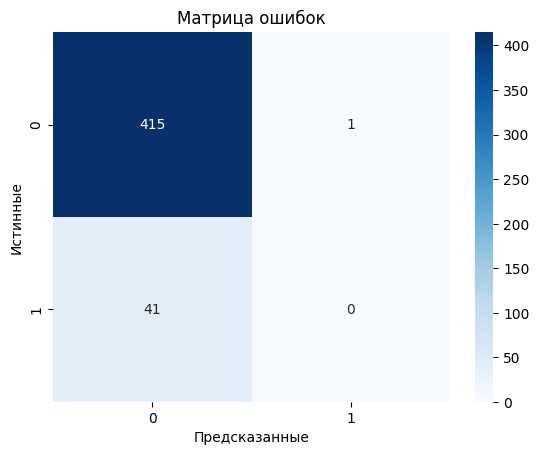

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Точность
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Метрики по классам
print(classification_report(y_test, y_pred))

# Матрица ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title('Матрица ошибок')
plt.show()